# Predicting stock and stock price index movement using SVM and LSTMN Prediction Model

---

## Abstract

---

Recurrent Neural Networks (RNN) are a powerful and robust type of neural networks and belong to the most promising algorithms out there at the moment because they are the only ones with an internal memory.

Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

This is the reason why they are the preferred algorithm for sequential data like time series, speech, text, financial data, audio, video, weather and much more because they can form a much deeper understanding of a sequence and its context, compared to other algorithms.


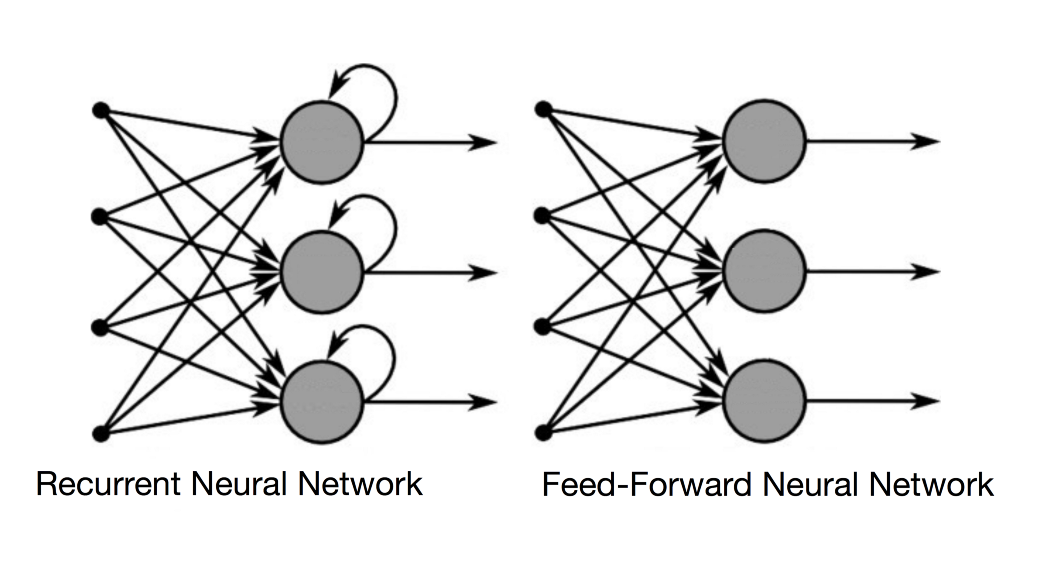


You can view a RNN as a sequence of Neural Networks that you train one after another with backpropagation.

The image below illustrates an unrolled RNN. On the left, you can see the RNN, which is unrolled after the equal sign.
![alt text](0_YNLOjW7YVJarwMD4.png "Title")

---


-----


## Part 0 - Getting Data

For data collection we have used yahoo finance. Yahoo Finance is a database with stock prices for various companies. Most of the companies we chose were in the sector of technology. Ex. Apple, Google, Yahoo, Microsoft etc. We have collected data from January 2010 to December 2016. The stock market took a toll during 2007-2008 financial crisis. This time around, companies went in loss and stock data of companies completely unpredictable. Training our model using this data would cause our model to be less accurate because of a lack of trend during the crisis period. So we have avoided data that can result into uncertain behavior.

The data set contains stock data of the following companies:


* Apple
* Google
* Amazon

For our problem we have kept technology and software services as a sector. For that sector we have tried to predict trend and behavior of stock. These are all listed on the same index Nasdaq. The stock data obtained from yahoo contains the following parameters:

* Date
* Open
* High
* Low
* Close
* Adj Close
* Volume
We took the daily closing values of each of the stock as the stock value for a day.


----

### Technical Indictors

Basic assumption in stock market is that stock momentum, increase or decrease will depend on how given stock was doing in past. Also, the stock price for given company will also depend on how market is doing and how given sector is doing. Keeping these three things in mind we have calculated 5 technical indicators as listed below.

* Index_Momentum
* Index_Volatility
* Sector_Momentum
* Stock_Momentum
* Stock_Price_Volatility
* Output

---


##### Momentum:
If price of stock or index in higher than yesterday then momentum for given day is +1 as there is an increase in price else it’s -1.

##### Volatility:
Represents how big or small change in stock /index closing values. Try to capture fluctuation in market. For given day Volatility is calculated using difference between yesterday's closing value - today’s closing value divide by yesterday’s closing value.

##### Index_Momentum:
Calculated based on market performance for last 5 days. It’s an average of 5 days index momentum. Index_Volatility: Calculated as average of last 5 days Volatility for index.

##### Sector_Momentum:
Calculated based on sector performance for last 5 days. It’s an average of 5 days index value for all technology company shares.

##### Stock_Momentum:
Calculated as average for last 5 days momentum for given company momentum

##### Stock_Price_Volatility:
Calculated as average of last 5 days for given stock.

For all attributes we've kept 5 days as to capture market behavior. In future it can be modified for 10, 15 days and see if there is any improvement in accuracy. Once we've calculated these attributes for each company we consolidated all the dataset and created final input dataset.

##### Output:
If closing stock price for a stock today day is more than yesterday’s closing stock price for the same stock, then the corresponding output is denoted by 1 else it is denoted as 0.

Hence. one record of our input data set had the following 6 dimensions:

* Stock Price
* Index_Momentum
* Index_Volatility
* Sector_Momentum
* Stock_Momentum
* Stock_Price_Volatility
* Output

Data set consisted of these 6 dimensions for each of the stocks. I.E. each day has 9 records, one record for each company stock. The total number of rows for our input data set are around 15800.

----

In [7]:
from pandas_datareader import data

In [8]:
import pandas as pd

In [9]:
data_source = 'yahoo'

In [10]:
start_date = '2010-01-01'
end_date = '2016-12-31'

In [11]:
symbols = ['AAPL','AMZN','GOOG']

In [12]:
for i in symbols:
    data.DataReader(i,data_source,start_date,end_date).to_csv(i+'.csv')

---

# Part 1 - Dataset Creation

---

In [26]:
import pandas as pd

In [27]:
file = 'AAPL.csv'

In [28]:
xl = pd.read_csv(file)
date = xl['Date']
Close = xl['Close']
AD_Position = Close.copy()
Change = [0]* len(date)
Momentum = [0]* len(date)

dates = [i.split(' ', 1)[0] for i in date]

reference = dates[0]


for i in range (1,len(date)):
    if Close[i] > Close[i-1] :
        Momentum[i] = "1"
        Change[i] = (Close[i]-Close[i-1])/Close[i-1]
    else :
        Momentum[i] = "0"
        Change[i] = (Close[i-1] - Close[i]) / Close[i - 1]

xl = pd.DataFrame({'Date':date, 'Close':Close,'Change':Change,'Momentum':Momentum}) # a represents closing date b represents closing value c represents close change and d represents momentum

xl.to_csv("Apple_Modified.csv",index=False,header=True)

In [29]:
file = 'AMZN.csv'
xl = pd.read_csv(file)
date = xl['Date']
Close = xl['Close']
AD_Position = Close.copy()
Change = [0]* len(date)
Momentum = [0]* len(date)

dates = [i.split(' ', 1)[0] for i in date]

reference = dates[0]


for i in range (1,len(date)):
    if Close[i] > Close[i-1] :
        Momentum[i] = "1"
        Change[i] = (Close[i]-Close[i-1])/Close[i-1]
    else :
        Momentum[i] = "0"
        Change[i] = (Close[i-1] - Close[i]) / Close[i - 1]

xl = pd.DataFrame({'Date':date, 'Close':Close,'Change':Change,'Momentum':Momentum}) # a represents closing date b represents closing value c represents close change and d represents momentum

xl.to_csv("Amazon_Modified.csv",index=False,header=True)

In [30]:
file = 'GOOG.csv'
xl = pd.read_csv(file)
date = xl['Date']
Close = xl['Close']
AD_Position = Close.copy()
Change = [0]* len(date)
Momentum = [0]* len(date)

dates = [i.split(' ', 1)[0] for i in date]

reference = dates[0]


for i in range (1,len(date)):
    if Close[i] > Close[i-1] :
        Momentum[i] = "1"
        Change[i] = (Close[i]-Close[i-1])/Close[i-1]
    else :
        Momentum[i] = "0"
        Change[i] = (Close[i-1] - Close[i]) / Close[i - 1]

xl = pd.DataFrame({'Date':date, 'Close':Close,'Change':Change,'Momentum':Momentum}) # a represents closing date b represents closing value c represents close change and d represents momentum

xl.to_csv("Google_Modified.csv",index=False,header=True)

---

# Part 2 - Dataset Consolidation
---

In [31]:
import pandas as pd


In [32]:
file1 = "Apple_Modified.csv"
file2 = "Amazon_Modified.csv"
file3 = "Google_Modified.csv"
file10 = "Nasdaq_Modified.csv"

In [36]:
xl1 = pd.read_csv(file1)
date_1 = xl1['Date']
Close_1 = xl1['Close']
Change_1 = xl1['Change']
Momentum_1 = xl1['Momentum']

In [37]:
xl2 = pd.read_csv(file2)
date_2 = xl2['Date']
Close_2 = xl2['Close']
Change_2 = xl2['Change']
Momentum_2 = xl2['Momentum']

In [38]:
xl3 = pd.read_csv(file3)
date_3 = xl3['Date']
Close_3 = xl3['Close']
Change_3 = xl3['Change']
Momentum_3 = xl3['Momentum']

In [39]:
xl10 = pd.read_csv(file10)
date_10 = xl10['Date']
Close_10 = xl10['Close']
Change_10 = xl10['Change']
Momentum_10 = xl10['Momentum']

In [40]:
n = 5
Close,Change,Stock_Price_Volatility,Stock_Momentum, Index_Volatility,Index_Momentum, Sector_Momentum = [],[],[],[],[],[],[]

In [41]:
for i in range(5,1762):
    file1_close = (Change_1[i]+Change_1[i-1]+Change_1[i-2]+Change_1[i-3]+Change_1[i-4])/5
    file1_Stock_Momentum = (Momentum_1[i] + Momentum_1[i - 1] + Momentum_1[i - 2] + Momentum_1[i - 3] + Momentum_1[i - 4]) / 5
    file2_close = (Change_2[i]+Change_2[i-1]+Change_2[i-2]+Change_2[i-3]+Change_2[i-4])/5
    file2_Stock_Momentum = (Momentum_2[i] + Momentum_2[i - 1] + Momentum_2[i - 2] + Momentum_2[i - 3] + Momentum_2[i - 4]) / 5
    file3_close = (Change_3[i]+Change_3[i-1]+Change_3[i-2]+Change_3[i-3]+Change_3[i-4])/5
    file3_Stock_Momentum = (Momentum_3[i] + Momentum_3[i - 1] + Momentum_3[i - 2] + Momentum_3[i - 3] + Momentum_3[i - 4]) / 5
    file10_close = (Change_10[i]+Change_10[i-1]+Change_10[i-2]+Change_10[i-3]+Change_10[i-4])/5
    file10_Stock_Momentum = (Momentum_10[i] + Momentum_10[i - 1] + Momentum_10[i - 2] + Momentum_10[i - 3] + Momentum_10[i - 4]) / 5
    Sector_momentum = (file1_Stock_Momentum  + file2_Stock_Momentum + file3_Stock_Momentum)/3

    Close.append(Close_1[i])
    Change.append(Momentum_1[i])
    Stock_Price_Volatility.append(file1_close)
    Stock_Momentum.append(file1_Stock_Momentum)
    Index_Volatility.append(file10_close)
    Index_Momentum.append(file10_Stock_Momentum)
    Sector_Momentum.append(Sector_momentum)

    Close.append(Close_2[i])
    Change.append(Momentum_2[i])
    Stock_Price_Volatility.append(file2_close)
    Stock_Momentum.append(file2_Stock_Momentum)
    Index_Volatility.append(file10_close)
    Index_Momentum.append(file10_Stock_Momentum)
    Sector_Momentum.append(Sector_momentum)

    Close.append(Close_3[i])
    Change.append(Momentum_3[i])
    Stock_Price_Volatility.append(file3_close)
    Stock_Momentum.append(file3_Stock_Momentum)
    Index_Volatility.append(file10_close)
    Index_Momentum.append(file10_Stock_Momentum)
    Sector_Momentum.append(Sector_momentum)
xl = pd.DataFrame({'Close':Close, 'Change':Change,'Stock_Price_Volatility':Stock_Price_Volatility,'Stock_Momentum':Stock_Momentum,'Index_Volatility':Index_Volatility,'Index_Momentum':Index_Momentum,'Sector_Momentum':Sector_Momentum}) # a represents closing date b represents closing value c represents close change and d represents momentum
#
xl.to_csv("Input_Dataset.csv",index=False,header=False)



    

----

# Part 3 - Implementing Long Short Term Memory Networks

---

### Importing Libraries

In [42]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


### Convert series to supervised learning

In [44]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()

    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    agg = concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [ ]:
dataset = read_csv('Input_Dataset_LSTM.csv', header=0,)
values = dataset.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(values)

n_hours = 1
n_features = 6

reframed = series_to_supervised(scaled, n_hours, 0)



values = reframed.values


n_epoch = 30
w = 0
r = 1
runs = [0]*30

for j in range(0,30):
	n_train_hours = 10000
	train = values[:n_train_hours, :]
	test = values[n_train_hours:, :]
	
	n_obs = n_hours * n_features
	train_X, train_y = train[:, :n_obs], train[:,-1]
	test_X, test_y = test[:, :n_obs], test[:, -1]
	
	train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
	test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
	
	model = Sequential()
	model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
	model.add(Dense(1))
	model.compile(loss='mae', optimizer='adam')
	
	history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
	# plot history
	# pyplot.plot(history.history['loss'], label='train')
	# pyplot.plot(history.history['val_loss'], label='test')
	# pyplot.legend()
	# pyplot.show()

	# # make a prediction
	yhat = model.predict(test_X)


	test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

	# # invert scaling for forecast
	inv_yhat = concatenate((yhat, test_X[:, -6:]), axis=1)
	inv_yhat = scaler.inverse_transform(inv_yhat)
	inv_yhat = inv_yhat[:,0]

	# # invert scaling for actual
	test_y = test_y.reshape((len(test_y), 1))
	inv_y = concatenate((test_y, test_X[:, -6:]), axis=1)
	inv_y = scaler.inverse_transform(inv_y)
	inv_y = inv_y[:,0]
	count = 0

	for i in range(0,len(inv_yhat)):
		if int(inv_yhat[i]) > 99:
			inv_yhat[i] = 1
		else: inv_yhat[i] = 0
		if int(inv_y[i]) > 99:
			inv_y[i] = 1
		else: inv_y[i] = 0
		if inv_y[i] == inv_yhat[i]:count +=1

	accuracy = (count/len(yhat))*100
	runs[j] = accuracy
	print("Accuracy:"+ str(accuracy))

for i in range(0,len(runs)):
	print("Accuracy:" + str(runs[i]))
mean = sum(runs)/len(runs)
print("n_epoch: {}".format(n_epoch))
print("Mean_Accuracy: {}".format(mean))
print("Standard_Deviation: {}".format(np.std(runs, 0)))

Train on 10000 samples, validate on 5811 samples
Epoch 1/50
 - 3s - loss: 0.9241 - val_loss: 0.8114
Epoch 2/50
 - 1s - loss: 0.7934 - val_loss: 0.7730
Epoch 3/50
 - 1s - loss: 0.7775 - val_loss: 0.7621
Epoch 4/50
 - 1s - loss: 0.7676 - val_loss: 0.7554
Epoch 5/50
 - 1s - loss: 0.7625 - val_loss: 0.7533
Epoch 6/50
 - 1s - loss: 0.7603 - val_loss: 0.7527
Epoch 7/50
 - 1s - loss: 0.7595 - val_loss: 0.7520
Epoch 8/50
 - 0s - loss: 0.7586 - val_loss: 0.7509
Epoch 9/50
 - 0s - loss: 0.7577 - val_loss: 0.7497
Epoch 10/50
 - 1s - loss: 0.7564 - val_loss: 0.7483
Epoch 11/50
 - 1s - loss: 0.7556 - val_loss: 0.7470
Epoch 12/50
 - 1s - loss: 0.7544 - val_loss: 0.7457
Epoch 13/50
 - 1s - loss: 0.7529 - val_loss: 0.7440
Epoch 14/50
 - 1s - loss: 0.7518 - val_loss: 0.7427
Epoch 15/50
 - 1s - loss: 0.7503 - val_loss: 0.7408
Epoch 16/50
 - 1s - loss: 0.7484 - val_loss: 0.7390
Epoch 17/50
 - 1s - loss: 0.7469 - val_loss: 0.7373
Epoch 18/50
 - 1s - loss: 0.7450 - val_loss: 0.7355
Epoch 19/50
 - 1s - loss

Epoch 4/50
 - 1s - loss: 0.7652 - val_loss: 0.7538
Epoch 5/50
 - 1s - loss: 0.7609 - val_loss: 0.7530
Epoch 6/50
 - 1s - loss: 0.7598 - val_loss: 0.7526
Epoch 7/50
 - 1s - loss: 0.7589 - val_loss: 0.7512
Epoch 8/50
 - 1s - loss: 0.7581 - val_loss: 0.7505
Epoch 9/50
 - 1s - loss: 0.7573 - val_loss: 0.7494
Epoch 10/50
 - 1s - loss: 0.7561 - val_loss: 0.7476
Epoch 11/50
 - 1s - loss: 0.7551 - val_loss: 0.7464
Epoch 12/50
 - 1s - loss: 0.7539 - val_loss: 0.7449
Epoch 13/50
 - 1s - loss: 0.7527 - val_loss: 0.7431
Epoch 14/50
 - 1s - loss: 0.7512 - val_loss: 0.7420
Epoch 15/50
 - 1s - loss: 0.7497 - val_loss: 0.7403
Epoch 16/50
 - 1s - loss: 0.7482 - val_loss: 0.7384
Epoch 17/50
 - 1s - loss: 0.7464 - val_loss: 0.7371
Epoch 18/50
 - 0s - loss: 0.7447 - val_loss: 0.7351
Epoch 19/50
 - 0s - loss: 0.7425 - val_loss: 0.7333
Epoch 20/50
 - 1s - loss: 0.7404 - val_loss: 0.7312
Epoch 21/50
 - 0s - loss: 0.7383 - val_loss: 0.7287
Epoch 22/50
 - 0s - loss: 0.7358 - val_loss: 0.7262
Epoch 23/50
 - 1s 

Epoch 8/50
 - 1s - loss: 0.7586 - val_loss: 0.7513
Epoch 9/50
 - 1s - loss: 0.7578 - val_loss: 0.7499
Epoch 10/50
 - 1s - loss: 0.7567 - val_loss: 0.7489
Epoch 11/50
 - 1s - loss: 0.7558 - val_loss: 0.7475
Epoch 12/50
 - 1s - loss: 0.7549 - val_loss: 0.7463
Epoch 13/50
 - 1s - loss: 0.7534 - val_loss: 0.7448
Epoch 14/50
 - 1s - loss: 0.7523 - val_loss: 0.7432
Epoch 15/50
 - 1s - loss: 0.7510 - val_loss: 0.7416
Epoch 16/50
 - 1s - loss: 0.7497 - val_loss: 0.7404
Epoch 17/50
 - 1s - loss: 0.7481 - val_loss: 0.7390
Epoch 18/50
 - 1s - loss: 0.7466 - val_loss: 0.7372
Epoch 19/50
 - 1s - loss: 0.7449 - val_loss: 0.7354
Epoch 20/50
 - 1s - loss: 0.7432 - val_loss: 0.7337
Epoch 21/50
 - 1s - loss: 0.7412 - val_loss: 0.7318
Epoch 22/50
 - 1s - loss: 0.7391 - val_loss: 0.7299
Epoch 23/50
 - 1s - loss: 0.7368 - val_loss: 0.7275
Epoch 24/50
 - 1s - loss: 0.7344 - val_loss: 0.7251
Epoch 25/50
 - 1s - loss: 0.7319 - val_loss: 0.7224
Epoch 26/50
 - 1s - loss: 0.7288 - val_loss: 0.7194
Epoch 27/50
 -

Epoch 12/50
 - 1s - loss: 0.7545 - val_loss: 0.7461
Epoch 13/50
 - 1s - loss: 0.7532 - val_loss: 0.7446
Epoch 14/50
 - 1s - loss: 0.7518 - val_loss: 0.7427
Epoch 15/50
 - 1s - loss: 0.7502 - val_loss: 0.7411
Epoch 16/50
 - 1s - loss: 0.7484 - val_loss: 0.7389
Epoch 17/50
 - 1s - loss: 0.7465 - val_loss: 0.7372
Epoch 18/50
 - 1s - loss: 0.7446 - val_loss: 0.7352
Epoch 19/50
 - 1s - loss: 0.7425 - val_loss: 0.7331
Epoch 20/50
 - 1s - loss: 0.7401 - val_loss: 0.7306
Epoch 21/50
 - 1s - loss: 0.7376 - val_loss: 0.7279
Epoch 22/50
 - 1s - loss: 0.7348 - val_loss: 0.7250
Epoch 23/50
 - 1s - loss: 0.7317 - val_loss: 0.7217
Epoch 24/50
 - 1s - loss: 0.7281 - val_loss: 0.7178
Epoch 25/50
 - 1s - loss: 0.7242 - val_loss: 0.7139
Epoch 26/50
 - 1s - loss: 0.7204 - val_loss: 0.7099
Epoch 27/50
 - 1s - loss: 0.7163 - val_loss: 0.7056
Epoch 28/50
 - 1s - loss: 0.7125 - val_loss: 0.7017
Epoch 29/50
 - 1s - loss: 0.7089 - val_loss: 0.6974
Epoch 30/50
 - 1s - loss: 0.7052 - val_loss: 0.6938
Epoch 31/50


Epoch 16/50
 - 1s - loss: 0.7487 - val_loss: 0.7391
Epoch 17/50
 - 1s - loss: 0.7469 - val_loss: 0.7373
Epoch 18/50
 - 1s - loss: 0.7449 - val_loss: 0.7350
Epoch 19/50
 - 1s - loss: 0.7425 - val_loss: 0.7328
Epoch 20/50
 - 1s - loss: 0.7399 - val_loss: 0.7297
Epoch 21/50
 - 1s - loss: 0.7370 - val_loss: 0.7267
Epoch 22/50
 - 1s - loss: 0.7339 - val_loss: 0.7234
Epoch 23/50
 - 1s - loss: 0.7306 - val_loss: 0.7199
Epoch 24/50
 - 1s - loss: 0.7271 - val_loss: 0.7163
Epoch 25/50
 - 1s - loss: 0.7234 - val_loss: 0.7122
Epoch 26/50
 - 1s - loss: 0.7194 - val_loss: 0.7081
Epoch 27/50
 - 1s - loss: 0.7155 - val_loss: 0.7035
Epoch 28/50
 - 1s - loss: 0.7111 - val_loss: 0.6991
Epoch 29/50
 - 1s - loss: 0.7067 - val_loss: 0.6942
Epoch 30/50
 - 1s - loss: 0.7025 - val_loss: 0.6896
Epoch 31/50
 - 1s - loss: 0.6985 - val_loss: 0.6858
Epoch 32/50
 - 1s - loss: 0.6952 - val_loss: 0.6820
Epoch 33/50
 - 1s - loss: 0.6919 - val_loss: 0.6792
Epoch 34/50
 - 1s - loss: 0.6894 - val_loss: 0.6761
Epoch 35/50


Epoch 20/50
 - 1s - loss: 0.7439 - val_loss: 0.7342
Epoch 21/50
 - 1s - loss: 0.7419 - val_loss: 0.7330
Epoch 22/50
 - 1s - loss: 0.7396 - val_loss: 0.7296
Epoch 23/50
 - 1s - loss: 0.7369 - val_loss: 0.7271
Epoch 24/50
 - 1s - loss: 0.7339 - val_loss: 0.7239
Epoch 25/50
 - 1s - loss: 0.7308 - val_loss: 0.7202
Epoch 26/50
 - 1s - loss: 0.7272 - val_loss: 0.7163
Epoch 27/50
 - 1s - loss: 0.7229 - val_loss: 0.7119
Epoch 28/50
 - 1s - loss: 0.7187 - val_loss: 0.7074
Epoch 29/50
 - 1s - loss: 0.7148 - val_loss: 0.7030
Epoch 30/50
 - 1s - loss: 0.7111 - val_loss: 0.6986
Epoch 31/50
 - 1s - loss: 0.7070 - val_loss: 0.6944
Epoch 32/50
 - 1s - loss: 0.7032 - val_loss: 0.6905
Epoch 33/50
 - 1s - loss: 0.6994 - val_loss: 0.6867
Epoch 34/50
 - 1s - loss: 0.6962 - val_loss: 0.6831
Epoch 35/50
 - 1s - loss: 0.6932 - val_loss: 0.6801
Epoch 36/50
 - 1s - loss: 0.6908 - val_loss: 0.6775
Epoch 37/50
 - 1s - loss: 0.6888 - val_loss: 0.6754
Epoch 38/50
 - 1s - loss: 0.6873 - val_loss: 0.6740
Epoch 39/50


Epoch 24/50
 - 1s - loss: 0.7214 - val_loss: 0.7101
Epoch 25/50
 - 1s - loss: 0.7169 - val_loss: 0.7050
Epoch 26/50
 - 1s - loss: 0.7122 - val_loss: 0.6998
Epoch 27/50
 - 1s - loss: 0.7075 - val_loss: 0.6953
Epoch 28/50
 - 1s - loss: 0.7033 - val_loss: 0.6911
Epoch 29/50
 - 1s - loss: 0.6997 - val_loss: 0.6872
Epoch 30/50
 - 1s - loss: 0.6964 - val_loss: 0.6835
Epoch 31/50
 - 1s - loss: 0.6935 - val_loss: 0.6805
Epoch 32/50
 - 1s - loss: 0.6910 - val_loss: 0.6774
Epoch 33/50
 - 1s - loss: 0.6889 - val_loss: 0.6755
Epoch 34/50
 - 1s - loss: 0.6873 - val_loss: 0.6737
Epoch 35/50
 - 1s - loss: 0.6861 - val_loss: 0.6723
Epoch 36/50
 - 1s - loss: 0.6849 - val_loss: 0.6704
Epoch 37/50
 - 1s - loss: 0.6833 - val_loss: 0.6686
Epoch 38/50
 - 1s - loss: 0.6817 - val_loss: 0.6672
Epoch 39/50
 - 1s - loss: 0.6805 - val_loss: 0.6652
Epoch 40/50
 - 1s - loss: 0.6789 - val_loss: 0.6636
Epoch 41/50
 - 1s - loss: 0.6776 - val_loss: 0.6618
Epoch 42/50
 - 1s - loss: 0.6761 - val_loss: 0.6599
Epoch 43/50


Epoch 28/50
 - 1s - loss: 0.7272 - val_loss: 0.7169
Epoch 29/50
 - 1s - loss: 0.7232 - val_loss: 0.7128
Epoch 30/50
 - 1s - loss: 0.7194 - val_loss: 0.7085
Epoch 31/50
 - 1s - loss: 0.7155 - val_loss: 0.7043
Epoch 32/50
 - 1s - loss: 0.7118 - val_loss: 0.7006
Epoch 33/50
 - 1s - loss: 0.7084 - val_loss: 0.6973
Epoch 34/50
 - 1s - loss: 0.7053 - val_loss: 0.6934
Epoch 35/50
 - 1s - loss: 0.7019 - val_loss: 0.6895
Epoch 36/50
 - 1s - loss: 0.6986 - val_loss: 0.6861
Epoch 37/50
 - 1s - loss: 0.6956 - val_loss: 0.6829
Epoch 38/50
 - 1s - loss: 0.6930 - val_loss: 0.6803
Epoch 39/50
 - 1s - loss: 0.6907 - val_loss: 0.6775
Epoch 40/50
 - 1s - loss: 0.6891 - val_loss: 0.6759
Epoch 41/50
 - 1s - loss: 0.6873 - val_loss: 0.6738
Epoch 42/50
 - 1s - loss: 0.6861 - val_loss: 0.6725
Epoch 43/50
 - 1s - loss: 0.6844 - val_loss: 0.6704
Epoch 44/50
 - 1s - loss: 0.6832 - val_loss: 0.6686
Epoch 45/50
 - 1s - loss: 0.6819 - val_loss: 0.6670
Epoch 46/50
 - 1s - loss: 0.6805 - val_loss: 0.6654
Epoch 47/50


Epoch 32/50
 - 1s - loss: 0.6999 - val_loss: 0.6878
Epoch 33/50
 - 1s - loss: 0.6981 - val_loss: 0.6853
Epoch 34/50
 - 1s - loss: 0.6959 - val_loss: 0.6835
Epoch 35/50
 - 1s - loss: 0.6943 - val_loss: 0.6820
Epoch 36/50
 - 1s - loss: 0.6931 - val_loss: 0.6805
Epoch 37/50
 - 1s - loss: 0.6918 - val_loss: 0.6791
Epoch 38/50
 - 1s - loss: 0.6906 - val_loss: 0.6776
Epoch 39/50
 - 1s - loss: 0.6895 - val_loss: 0.6761
Epoch 40/50
 - 1s - loss: 0.6882 - val_loss: 0.6748
Epoch 41/50
 - 1s - loss: 0.6870 - val_loss: 0.6732
Epoch 42/50
 - 1s - loss: 0.6857 - val_loss: 0.6719
Epoch 43/50
 - 1s - loss: 0.6845 - val_loss: 0.6702
Epoch 44/50
 - 1s - loss: 0.6832 - val_loss: 0.6689
Epoch 45/50
 - 1s - loss: 0.6820 - val_loss: 0.6671
Epoch 46/50
 - 1s - loss: 0.6807 - val_loss: 0.6654
Epoch 47/50
 - 2s - loss: 0.6793 - val_loss: 0.6637
Epoch 48/50
 - 1s - loss: 0.6780 - val_loss: 0.6622
Epoch 49/50
 - 1s - loss: 0.6766 - val_loss: 0.6603
Epoch 50/50
 - 1s - loss: 0.6750 - val_loss: 0.6586
Accuracy:67.